# Checking if attacks happen more in summer than other seasons

In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv("data/attacks.csv", encoding='cp1252')

In [3]:
df.shape

(25723, 24)

In [4]:
df.info() #check out the info of the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

### Dropping all unnecesary data


- General Data

In [5]:
df.drop (labels= ['Case Number', 'Type', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'Unnamed: 22', 'Unnamed: 23', 'original order', 'Area', 'Location'], axis= 1, inplace= True)

In [6]:
df.drop_duplicates(inplace= True) #remove all the values duplicated

In [7]:
df.dropna(how= 'all',inplace= True) #removed all the rows which all the values were NaN.

In [8]:
df.sample()

,Date,Year,Country
3175,26-Aug-1976,1976.0,USA



- cleaning data not useful

df.drop (labels= ['Case Number', 'Type', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'Unnamed: 22', 'Unnamed: 23', 'original order', 'Area', 'Location'], axis= 1, inplace= True)

In [9]:
df.head()

,Date,Year,Country
0,25-Jun-2018,2018.0,USA
1,18-Jun-2018,2018.0,USA
2,09-Jun-2018,2018.0,USA
3,08-Jun-2018,2018.0,AUSTRALIA
4,04-Jun-2018,2018.0,MEXICO


### Deleting all the incidents happened before 1946 when the World Tourism Organization was created

In [10]:
df=df[df["Year"]>=1946] #remove the row before the year 

In [11]:
df['Year'] = df['Year'].astype('str') # remove the .0 format to have a proper year
df['Year'] = df['Year'].map(lambda x: x.rstrip('.0'))
df['Year'] = df['Year'].astype('int')

In [12]:
df.dropna(subset = ['Country'], inplace=True) # remove all the empty values for country

In [13]:
df['Country'] = df['Country'].apply(lambda x: x.lower())#lowercase to compare later with a list of countries

In [14]:
df['Country'] =df['Country'].str.strip()

In [15]:
df['Country'] = df['Country'].replace(["usa"], 'united states')
df['Country'] = df['Country'].replace(["sudan?"], 'sudan')
df['Country'] = df['Country'].replace(["united arab emirates (uae)"], 'united arab emirates')


### Creating a list of countries of the world separing them in between the north and south

# pending to create a function!!!!!!!!!

In [16]:
l_country= pd.read_csv('data/list_country.csv') #we can see there's a latitude empty, so we remove it
l_country.dropna(how= 'any',inplace= True)

In [17]:
l_country["hemisphere"]=l_country["latitude"].apply(lambda x : "north" if x>0 else "south")
l_country['name'] = l_country['name'].apply(lambda x: x.lower())

In [18]:
l_country.drop (labels= ['latitude','longitude'], axis= 1, inplace= True)

In [19]:
l_country= l_country[l_country.hemisphere == "south"]
south_list= l_country['name'].values.tolist()

In [20]:
l_country.reset_index(drop=True)

,name,hemisphere
0,angola,south
1,antarctica,south
2,argentina,south
3,american samoa,south
4,australia,south
...,...,...
58,samoa,south
59,mayotte,south
60,south africa,south
61,zambia,south


### Comparing the df's

- Checking both lists can find there are some discrepancies how the countries are described. so, we gonna implement some changes to adjust as much as many countries in order to match both lists

In [21]:
ls_country_df= df['Country'].values.tolist()

In [22]:
df.set_index(['Country'], inplace=True) 

In [23]:
lst_n_s=[]
for i in ls_country_df:
    if i in south_list:
        lst_n_s.append("south")
    else:
        lst_n_s.append("north")

In [24]:
dict_={"hemisphere":lst_n_s, "Country": ls_country_df}

In [25]:
df_hemisphere=pd.DataFrame(dict_)

In [26]:
df_hemisphere.set_index(['Country'], inplace=True) 

In [27]:
df_concat = pd.concat([df, df_hemisphere], axis=1)

# UNTIL HERE NEEDS TO BE CHECKED!!!!!!!!

### Creating the seasons according to the hemisphere

In [28]:
import re

In [29]:
df_concat['month'] = df_concat['Date'].apply(lambda x: re.search(r'-(\w+)-', x).group(1) if re.search(r'-(\w+)-', x) else "month_not_found")

In [30]:
df_concat.month.replace({'Ap':'Apr','July': 'Jul'}, inplace =True )

In [31]:
df_concat.month.unique()

array(['Jun', 'May', 'month_not_found', 'Apr', 'Mar', 'Feb', 'Jan', 'Dec',
       'Nov', 'Oct', 'Sep', 'Aug', 'Jul', '30'], dtype=object)

In [32]:
df_concat= df_concat[df_concat.month !='month_not_found'] 

In [33]:
df_concat= df_concat[df_concat.month !='30']

In [34]:
df_north= df_concat.loc[df_concat['hemisphere'] == "north"]#subset for northern countries

In [35]:
df_south= df_concat.loc[df_concat['hemisphere'] == "south"]#subset for southern countries

In [36]:
def south_season(month):
    season_month_south = {
            'Dec':'Summer', 'Jan':'Summer', 'Feb':'Summer',
            'Mar':'Autumn', 'Apr':'Autumn', 'May':'Autumn',
            'Jun':'Winter', 'Jul':'Winter', 'Aug':'Winter',
            'Sep':'Spring', 'Oct':'Spring', 'Nov':'Spring'}
    for key, value in season_month_south.items():
        if month in key:
            return value

In [37]:
df_south['season'] = df_south['month'].map(lambda month:south_season(month))

/var/folders/8p/zy_zh8_j0k926kzhhbp39j9c0000gn/T/ipykernel_48891/210517750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_south['season'] = df_south['month'].map(lambda month:south_season(month))


In [38]:
def north_season(month):
    season_month_north = {
            'Dec':'Winter', 'Jan':'Winter', 'Feb':'Winter',
            'Mar':'Spring', 'Apr':'Spring', 'May':'Spring',
            'Jun':'Summer', 'Jul':'Summer', 'Aug':'Summer',
            'Sep':'Autumn', 'Oct':'Autumn', 'Nov':'Autumn'}
    for key, value in season_month_north.items():
        if key in month:
            return value

In [39]:
df_north['season'] = df_north['month'].map(lambda month:north_season(month))

/var/folders/8p/zy_zh8_j0k926kzhhbp39j9c0000gn/T/ipykernel_48891/3300816878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_north['season'] = df_north['month'].map(lambda month:north_season(month))


In [40]:
df_north.count()

Date          2211
Year          2211
hemisphere    2211
month         2211
season        2211
dtype: int64

In [41]:
df_south.count()

Date          1638
Year          1638
hemisphere    1638
month         1638
season        1638
dtype: int64

### Extracting the data

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt


In [43]:
df_north.groupby("season").agg("count")

,Date,Year,hemisphere,month
season,,,,
Autumn,602,602,602,602
Spring,442,442,442,442
Summer,917,917,917,917
Winter,250,250,250,250


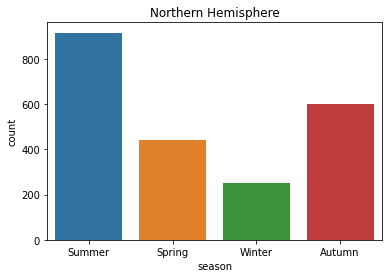

In [44]:
fig_north= sns.countplot(x=df_north.season).set(title='Northern Hemisphere');

In [45]:
df_south.groupby("season").agg("count")

,Date,Year,hemisphere,month
season,,,,
Autumn,394,394,394,394
Spring,338,338,338,338
Summer,652,652,652,652
Winter,254,254,254,254


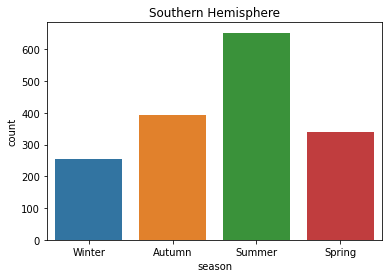

In [46]:
fig_south = sns.countplot(x=df_south.season).set(title='Southern Hemisphere');

In [47]:

df_both_hemisp_ = pd.concat([df_north, df_south], ignore_index=True, sort=False)

In [48]:
df_both_hemisp_.groupby("season").agg("count")

,Date,Year,hemisphere,month
season,,,,
Autumn,996,996,996,996
Spring,780,780,780,780
Summer,1569,1569,1569,1569
Winter,504,504,504,504


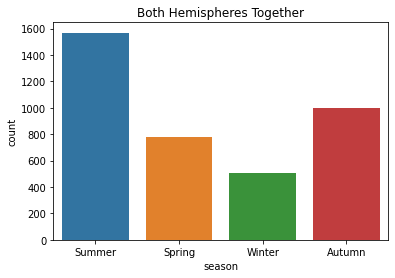

In [49]:
fig_both = sns.countplot(x=df_both_hemisp_.season).set(title='Both Hemispheres Together');

In [52]:
fig_both.save("image.png")

AttributeError: 'list' object has no attribute 'save'